In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Generate dataset distances

In [2]:
distances = pd.read_csv('../datasets/all_shortest_distances_mapped.tsv', sep= '\t')[['msa', 'pdb', 'pos_cre', 'pos_kd', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist']]
uniprot_pdb = pd.read_csv('../datasets/pdb_both_regions.tsv', sep= '\t')[['uniprot', 'pdb']].drop_duplicates()
distances = distances.merge(uniprot_pdb, how= 'left')
distances = distances[['msa', 'uniprot', 'pdb', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist']].sort_values('msa')
#distances.to_csv('../datasets/distances.tsv', sep= '\t', index= False)

### PTM sites

In [3]:
ptms = pd.read_csv('../datasets/contacts_w_modif_sites.tsv', sep= '\t')
ptms.columns = ptms.columns.str.lower()
ptms.columns = ptms.columns.str.replace("-", "_")
ptms

,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,phosphorylation_site,acetylation_site,methylation_site,o_galnac_site,o_glcnac_site,sumoylation_site,ubiquitination_site
0,A5K0N4_60,A5K0N4,5f0a,3,571,30.421984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A5K0N4_60,A5K0N4,5f0a,22,574,16.343960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A5K0N4_60,A5K0N4,5f0a,21,737,13.544628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A5K0N4_60,A5K0N4,5f0a,20,572,14.906104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A5K0N4_60,A5K0N4,5f0a,19,574,12.077919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60295,Q9UIK4_60,Q9UIK4,2a2a,295,255,4.121492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60296,Q9UIK4_60,Q9UIK4,2a2a,299,123,2.760634,299.0,NaN,NaN,NaN,NaN,NaN,NaN
60297,Q9UIK4_60,Q9UIK4,1z9x,301,121,2.771169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60298,Q9UIK4_60,Q9UIK4,1wmk,292,283,3.574533,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ptms.duplicated().any()

False

In [5]:
ptms.pdb.nunique()

804

In [6]:
ptms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60300 entries, 0 to 60299
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   msa                   60300 non-null  object 
 1   uniprot               60300 non-null  object 
 2   pdb                   60300 non-null  object 
 3   pos_cre_uniprot       60300 non-null  int64  
 4   pos_kd_uniprot        60300 non-null  int64  
 5   dist                  60300 non-null  float64
 6   phosphorylation_site  9598 non-null   float64
 7   acetylation_site      268 non-null    float64
 8   methylation_site      468 non-null    float64
 9   o_galnac_site         0 non-null      float64
 10  o_glcnac_site         11 non-null     float64
 11  sumoylation_site      103 non-null    float64
 12  ubiquitination_site   5727 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 6.0+ MB


In [7]:
# Add feature col (cre or kd)
prueba = ptms[(ptms.phosphorylation_site.notna()) ] # & (ptms.dist <= 6)

feature = []
for ix, row in prueba.iterrows():
    if row.phosphorylation_site == row.pos_cre_uniprot:
        feature.append("cre")
    elif row.phosphorylation_site == row.pos_kd_uniprot:
        feature.append("kd")

prueba["feature"] = feature
prueba["phosphorylation_site"] = "phosphorylation_site"
prueba

/home/alvaro/miniconda3/envs/alvenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/alvaro/miniconda3/envs/alvenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,phosphorylation_site,acetylation_site,methylation_site,o_galnac_site,o_glcnac_site,sumoylation_site,ubiquitination_site,feature
289,O77676_60,Q13976,7lv3,65,477,52.837521,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
301,O96013_60,O96013,4fie,50,480,3.626596,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,kd
310,P00519_60,P00519,3qrk,229,307,12.650022,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
311,P00519_60,P00519,3qrk,231,306,9.621026,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,kd
312,P00519_60,P00519,3qrk,232,291,7.982660,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60244,Q9UIK4_60,Q9UIK4,2cke,299,123,2.888161,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
60251,Q9UIK4_60,Q9UIK4,2a27,299,123,2.947065,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
60289,Q9UIK4_60,Q9UIK4,1z9x,299,123,2.799832,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre
60290,Q9UIK4_60,Q9UIK4,6paw,299,123,3.140278,phosphorylation_site,NaN,NaN,NaN,NaN,NaN,NaN,cre


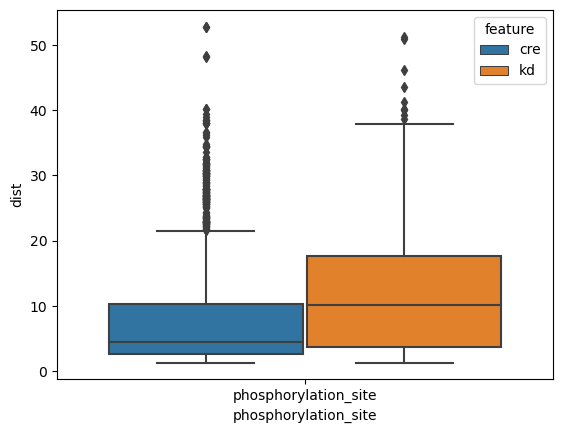

In [10]:
prueba_pho = prueba[['msa', 'uniprot', 'pdb', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist', 'phosphorylation_site', 'feature']]

sns.boxplot(x= 'phosphorylation_site', y= 'dist', data= prueba_pho, hue= 'feature')
plt.show()

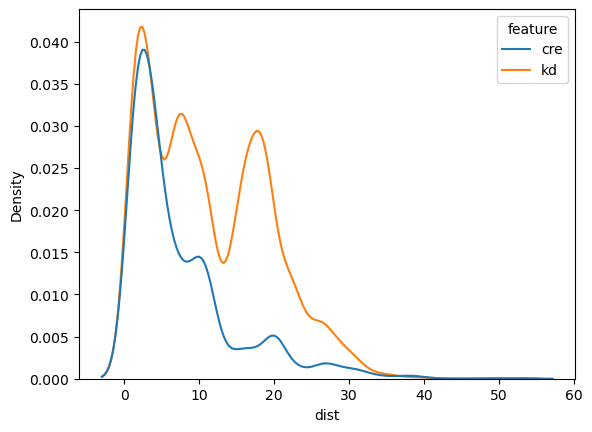

In [12]:
prueba_pho = prueba[['msa', 'uniprot', 'pdb', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist', 'phosphorylation_site', 'feature']]

sns.kdeplot(x= 'dist', data= prueba_pho, hue= 'feature')
plt.show()

In [14]:
def annotate_feature(df, col, label):
    #prueba = df[(df['col'].notna()) ] # & (ptms.dist <= 6)

    feature = []
    for ix, row in df.iterrows():
        if row[col] == row.pos_cre_uniprot:
            feature.append("cre")
        elif row[col] == row.pos_kd_uniprot:
            feature.append("kd")

    df["feature"] = feature
    df[col] = label
    return df[['msa', 'uniprot', 'pdb', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist', 'ptm', 'feature']]

In [15]:
# One df per PTM
phosphorylation = ptms[(ptms.phosphorylation_site.notna()) ].rename(columns= {'phosphorylation_site': 'ptm'})
phosphorylation = annotate_feature(phosphorylation, col= 'ptm', label= "phosphorylation")

acetylation = ptms[ptms.acetylation_site.notna()].rename(columns= {'acetylation_site': 'ptm'})
acetylation = annotate_feature(acetylation, col= 'ptm', label= "acetylation")

methylation = ptms[ptms.methylation_site.notna()].rename(columns= {'methylation_site': 'ptm'})
methylation = annotate_feature(methylation, col= 'ptm', label= "methylation")

galnac = ptms[ptms.o_galnac_site.notna()].rename(columns= {'o_galnac_site': 'ptm'})
galnac = annotate_feature(galnac, col= 'ptm', label= "o-galnac")

glcnac = ptms[ptms.o_glcnac_site.notna()].rename(columns= {'o_glcnac_site': 'ptm'})
glcnac = annotate_feature(glcnac, col= 'ptm', label= "o-glcnac")

sumoylation = ptms[ptms.sumoylation_site.notna()].rename(columns= {'sumoylation_site': 'ptm'})
sumoylation = annotate_feature(sumoylation, col= 'ptm', label= "sumoylation")

ubiquitination = ptms[ptms.ubiquitination_site.notna()].rename(columns= {'ubiquitination_site': 'ptm'})
ubiquitination = annotate_feature(ubiquitination, col= 'ptm', label= "ubiquitination")


df = pd.concat([phosphorylation, acetylation, methylation, galnac, glcnac, sumoylation, ubiquitination])
#df = df[['msa', 'uniprot', 'pdb', 'pos_cre_uniprot', 'pos_kd_uniprot', 'dist', 'ptm']]
df

,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,ptm,feature
289,O77676_60,Q13976,7lv3,65,477,52.837521,phosphorylation,cre
301,O96013_60,O96013,4fie,50,480,3.626596,phosphorylation,kd
310,P00519_60,P00519,3qrk,229,307,12.650022,phosphorylation,cre
311,P00519_60,P00519,3qrk,231,306,9.621026,phosphorylation,kd
312,P00519_60,P00519,3qrk,232,291,7.982660,phosphorylation,cre
...,...,...,...,...,...,...,...,...
59765,Q8BW96_60,Q8IU85,2jc6,287,247,2.640575,ubiquitination,cre
59770,Q8BW96_60,Q8IU85,6t6f,287,117,3.436256,ubiquitination,cre
59900,Q8IU85_60,Q8IU85,6qp5,287,116,3.498242,ubiquitination,cre
59916,Q8IU85_60,Q8IU85,2jc6,287,247,2.640575,ubiquitination,cre


In [16]:
df[["ptm", 'feature']].value_counts()

ptm              feature
phosphorylation  kd         6253
ubiquitination   kd         3923
phosphorylation  cre        3345
ubiquitination   cre        1804
methylation      kd          344
acetylation      cre         135
                 kd          133
methylation      cre         124
sumoylation      cre         100
o-glcnac         kd           10
sumoylation      kd            3
o-glcnac         cre           1
dtype: int64

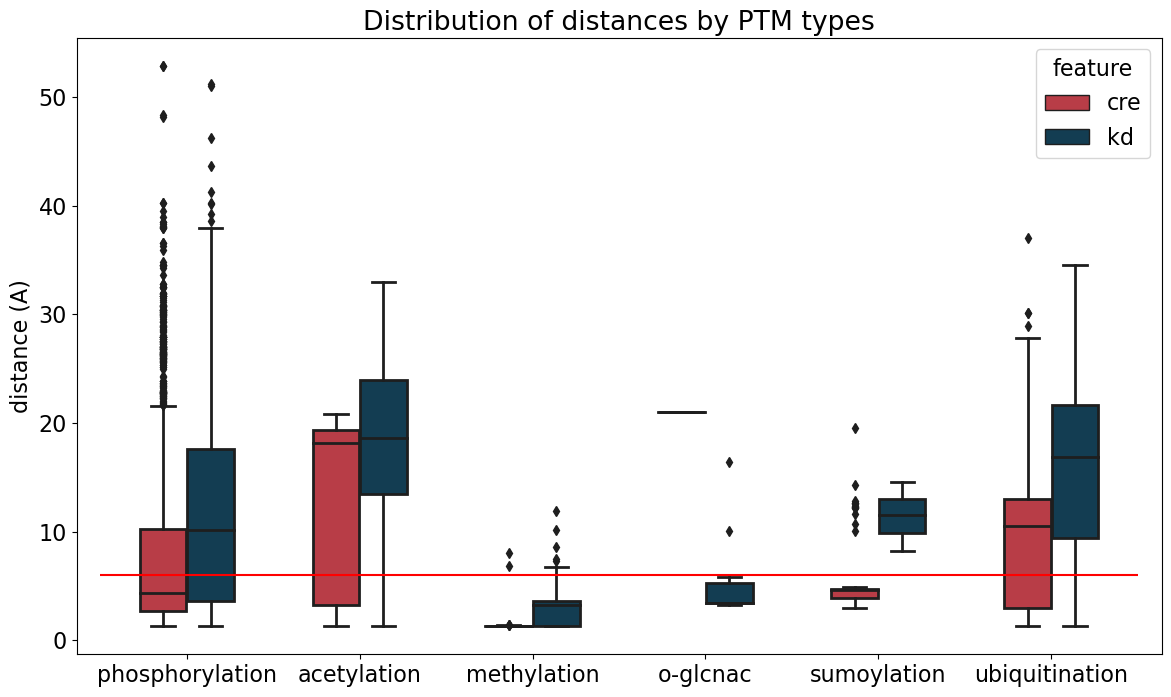

In [10]:
plt.figure(figsize= (14, 8))
plt.rcParams['font.size'] = 16
sns.boxplot(x= 'ptm', y= 'dist', data= df, hue= 'feature', palette= ['#cc2936', '#08415c'], width= 0.55, linewidth= 2)
plt.title("Distribution of distances by PTM types")
plt.ylabel('distance (A)')
plt.xlabel('')
plt.hlines(y=6, xmin=-0.5, xmax=5.5, colors= 'r')
plt.show()

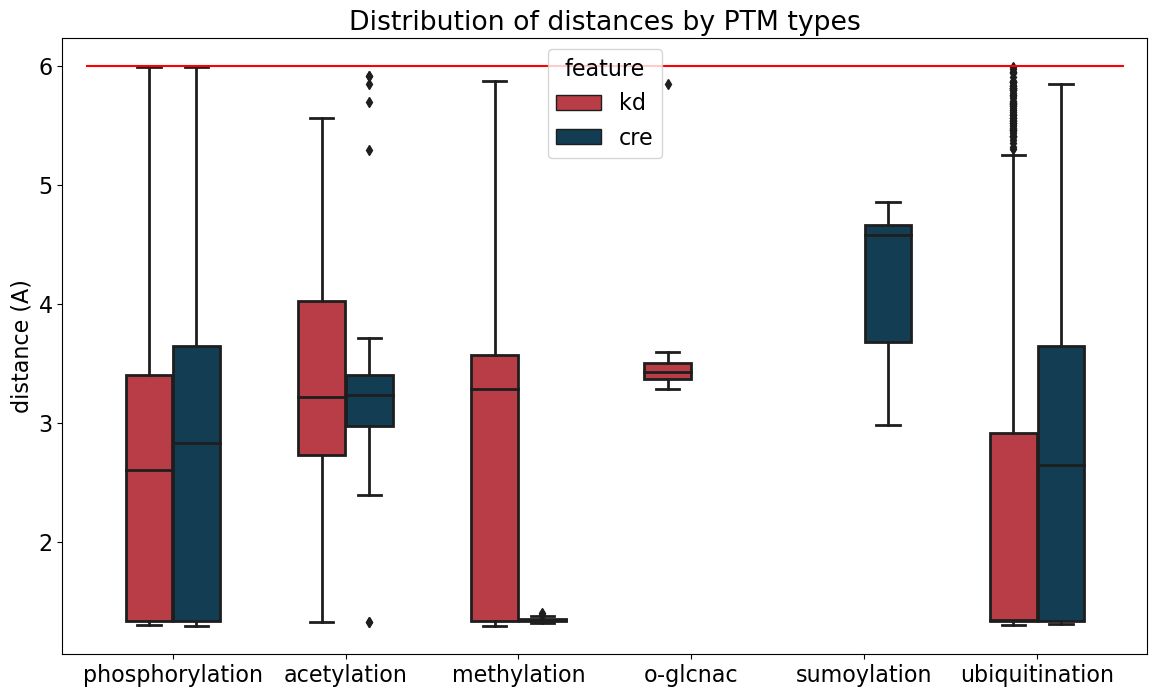

In [74]:
df2 = df[df.dist <= 6]
plt.figure(figsize= (14, 8))
plt.rcParams['font.size'] = 16
sns.boxplot(x= 'ptm', y= 'dist', data= df2, hue= 'feature', palette= ['#cc2936', '#08415c'], width= 0.55, linewidth= 2)
plt.title("Distribution of distances by PTM types")
plt.ylabel('distance (A)')
plt.xlabel('')
plt.hlines(y=6, xmin=-0.5, xmax=5.5, colors= 'r')
plt.show()

In [116]:
df_p = df[df.ptm == 'phosphorylation']

In [118]:
df_p

,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,ptm,feature
289,O77676_60,Q13976,7lv3,65,477,52.837521,phosphorylation,cre
301,O96013_60,O96013,4fie,50,480,3.626596,phosphorylation,kd
310,P00519_60,P00519,3qrk,229,307,12.650022,phosphorylation,cre
311,P00519_60,P00519,3qrk,231,306,9.621026,phosphorylation,kd
312,P00519_60,P00519,3qrk,232,291,7.982660,phosphorylation,cre
...,...,...,...,...,...,...,...,...
60244,Q9UIK4_60,Q9UIK4,2cke,299,123,2.888161,phosphorylation,cre
60251,Q9UIK4_60,Q9UIK4,2a27,299,123,2.947065,phosphorylation,cre
60289,Q9UIK4_60,Q9UIK4,1z9x,299,123,2.799832,phosphorylation,cre
60290,Q9UIK4_60,Q9UIK4,6paw,299,123,3.140278,phosphorylation,cre


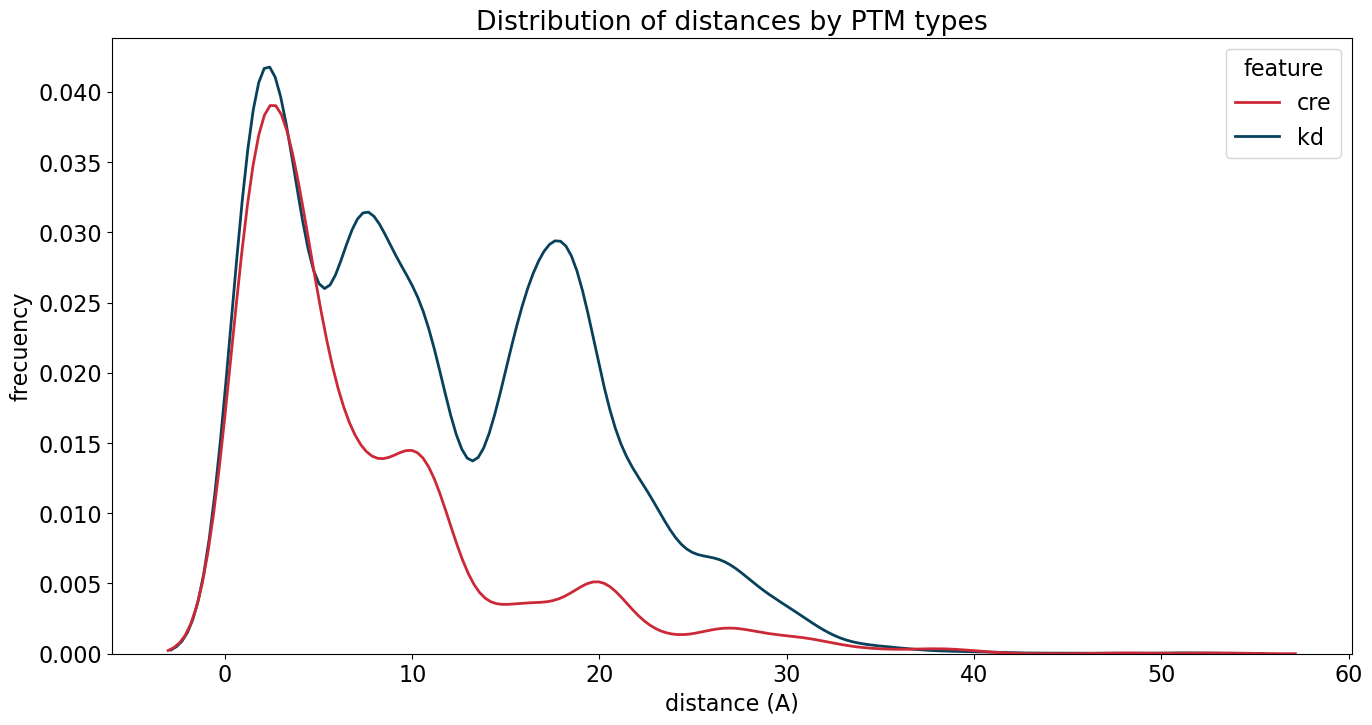

In [131]:
plt.figure(figsize= (16, 8))
plt.rcParams['font.size'] = 16
sns.kdeplot(x= 'dist', data= df_p, hue= 'feature', palette= ['#cc2936', '#08415c'], linewidth= 2) # , binwidth= 2
plt.title("Distribution of distances by PTM types")
plt.ylabel('frecuency')
plt.xlabel('distance (A)')
#plt.hlines(y=6, xmin=-0.5, xmax=5.5, colors= 'r')
plt.show()

In [147]:
dfp = df[df.ptm == 'phosphorylation']
dfp.feature.value_counts()

kd     6253
cre    3345
Name: feature, dtype: int64

In [22]:
abl1 = df[df.msa == 'P00519_60']
abl1

,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,ptm,feature
310,P00519_60,P00519,3qrk,229,307,12.650022,phosphorylation,cre
311,P00519_60,P00519,3qrk,231,306,9.621026,phosphorylation,kd
312,P00519_60,P00519,3qrk,232,291,7.982660,phosphorylation,cre
315,P00519_60,P00519,2hyy,446,252,23.709372,phosphorylation,cre
322,P00519_60,P00519,3qrj,469,252,28.796919,phosphorylation,cre
...,...,...,...,...,...,...,...,...
927,P00519_60,P00519,2hyy,274,247,9.245846,acetylation,cre
571,P00519_60,P00519,3qrj,400,252,11.626932,ubiquitination,cre
822,P00519_60,P00519,2hyy,400,252,12.200385,ubiquitination,cre
937,P00519_60,P00519,2hyy,285,235,10.829875,ubiquitination,cre


In [23]:
abl1 = abl1.drop(columns= 'pdb').drop_duplicates()
abl1

,msa,uniprot,pos_cre_uniprot,pos_kd_uniprot,dist,ptm,feature
310,P00519_60,P00519,229,307,12.650022,phosphorylation,cre
311,P00519_60,P00519,231,306,9.621026,phosphorylation,kd
312,P00519_60,P00519,232,291,7.982660,phosphorylation,cre
315,P00519_60,P00519,446,252,23.709372,phosphorylation,cre
322,P00519_60,P00519,469,252,28.796919,phosphorylation,cre
...,...,...,...,...,...,...,...
927,P00519_60,P00519,274,247,9.245846,acetylation,cre
571,P00519_60,P00519,400,252,11.626932,ubiquitination,cre
822,P00519_60,P00519,400,252,12.200385,ubiquitination,cre
937,P00519_60,P00519,285,235,10.829875,ubiquitination,cre


In [20]:
abl1.ptm.value_counts()

phosphorylation    221
ubiquitination       4
acetylation          1
Name: ptm, dtype: int64

In [25]:
# abl1 = df[df.msa == 'P00519_60']

# for ptm, subset in abl1.groupby('ptm'):

#     plt.figure(figsize= (10, 6))
#     plt.rcParams['font.size'] = 16
#     sns.kdeplot(x= 'dist', data= subset, hue= 'feature', hue_order=['cre', 'kd'], palette= ['#cc2936', '#08415c'], fill= True, linewidth= 3) # , binwidth= 2
#     plt.title(f"Distribution of distances by {ptm}")
#     plt.ylabel('frecuency')
#     plt.xlabel('distance (Å)')
#     #legend = [f"KD ({subset.feature.value_counts()['kd']})", f"CRE ({subset.feature.value_counts()['cre']})"]
#     #plt.legend(legend) 
#     #plt.hlines(y=6, xmin=-0.5, xmax=5.5, colors= 'r')
#     plt.show()

In [48]:
df[df.ptm == 'o-glcnac']

,msa,uniprot,pdb,pos_cre_uniprot,pos_kd_uniprot,dist,ptm,feature
31804,P31749_60,P31749,4ejn,20,308,5.847690,o-glcnac,kd
31831,P31749_60,P31749,7apj,129,204,21.033495,o-glcnac,cre
32327,P31749_60,P31749,7nh4,68,308,10.066621,o-glcnac,kd
32338,P31749_60,P31749,7nh4,70,308,16.391651,o-glcnac,kd
32450,P31749_60,P31749,6hhg,20,308,3.392110,o-glcnac,kd
32451,P31749_60,P31749,6hhg,19,308,3.422591,o-glcnac,kd
32622,P31749_60,P31749,7nh4,20,308,3.287323,o-glcnac,kd
32808,P31749_60,P31749,6hhj,20,308,3.294908,o-glcnac,kd
33006,P31749_60,P31749,6hhi,20,308,3.434287,o-glcnac,kd
59042,Q16566_60,Q16566,2w4o,308,137,3.474838,o-glcnac,kd


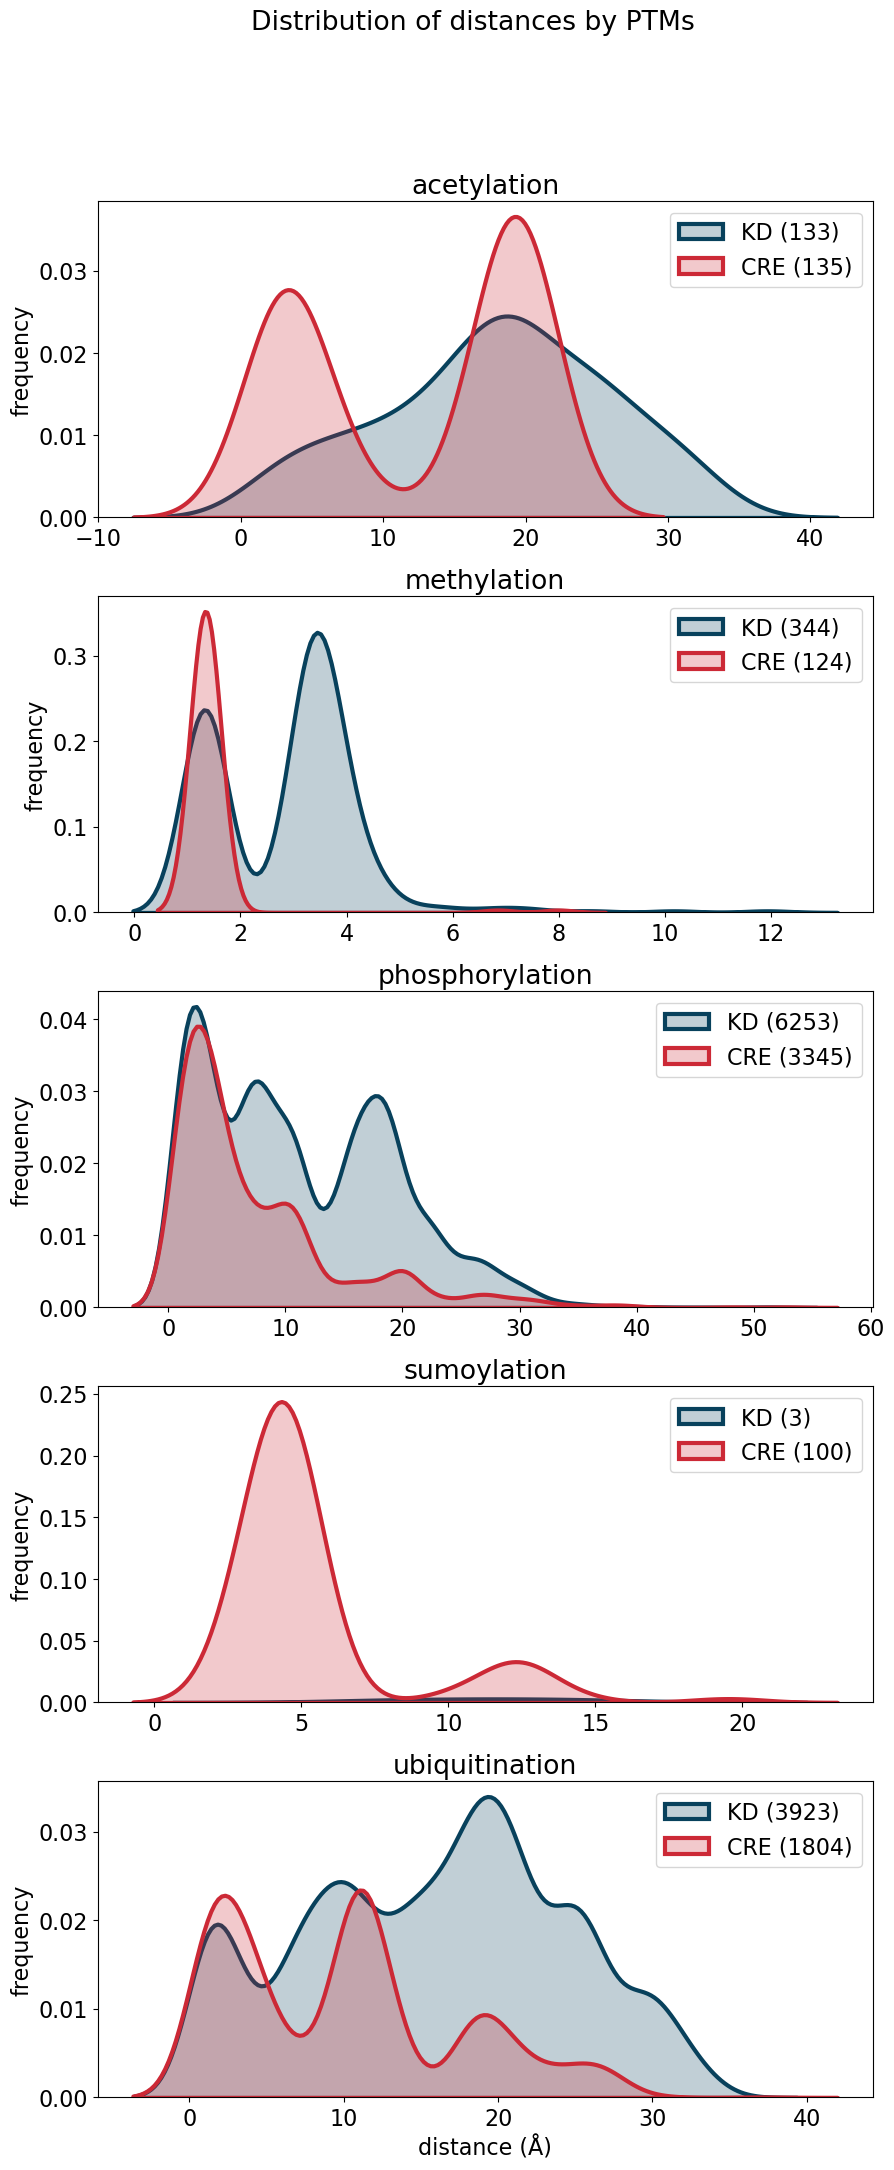

In [60]:
filtered_df = df[df['ptm'] != 'o-glcnac'] # because 'o-glcnac' only have one cre point

fig, axs = plt.subplots(len(filtered_df['ptm'].unique()), 1, figsize=(10, 4 * len(df['ptm'].unique())))

plt.rcParams['font.size'] = 16

for i, (ptm, subset) in enumerate(filtered_df.groupby('ptm')):
    sns.kdeplot(x='dist', data=subset, hue='feature', hue_order=['cre', 'kd'], palette=['#cc2936', '#08415c'], fill=True, linewidth=3, ax=axs[i])
    axs[i].set_title(f"{ptm}")
    axs[i].set_ylabel('frequency')
    axs[i].set_xlabel('')
    legend = [f"KD ({subset.feature.value_counts()['kd']})", f"CRE ({subset.feature.value_counts()['cre']})"]
    axs[i].legend(legend)

plt.xlabel('distance (Å)')  # Add the common X label for all subplots
plt.suptitle("Distribution of distances by PTMs")
# Adjust the spacing between subplots
plt.subplots_adjust(hspace= 0.25, top= 0.9)

plt.show()

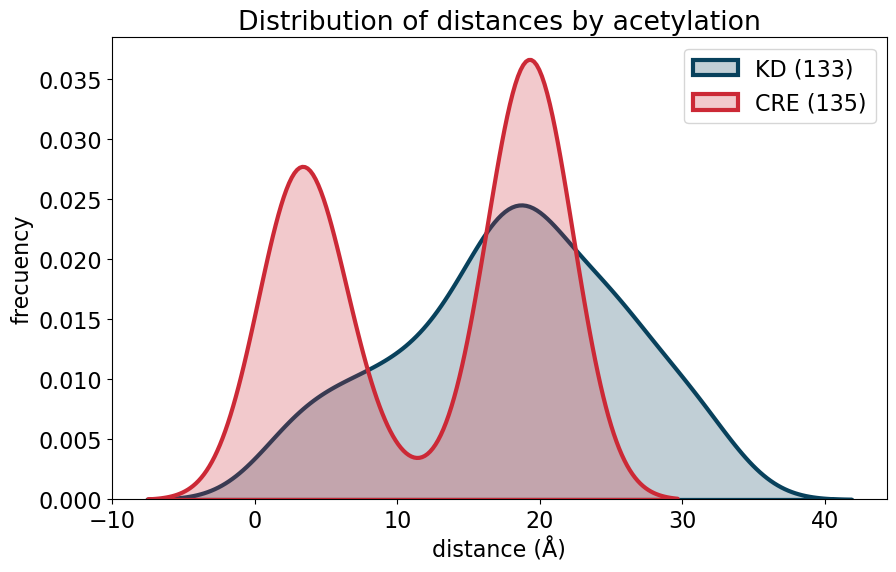

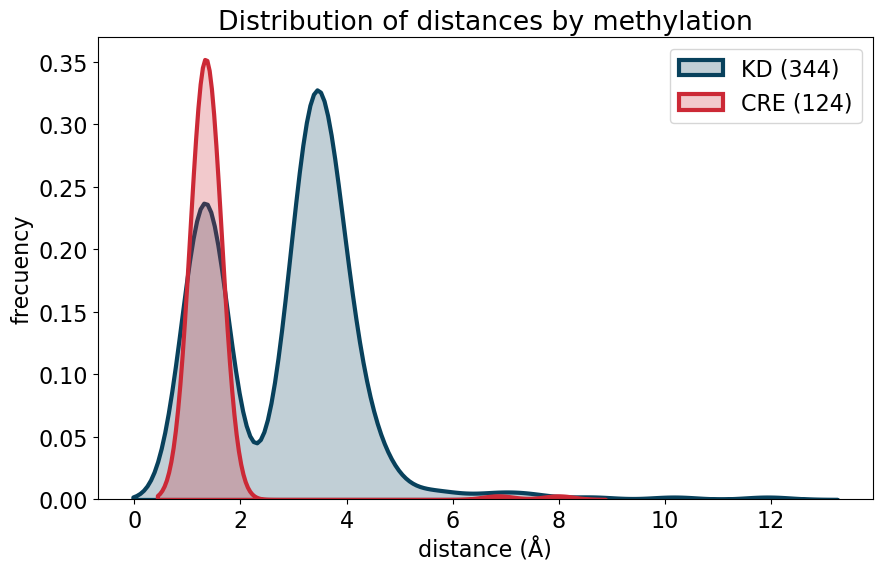

/home/alvaro/miniconda3/envs/alvenv/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


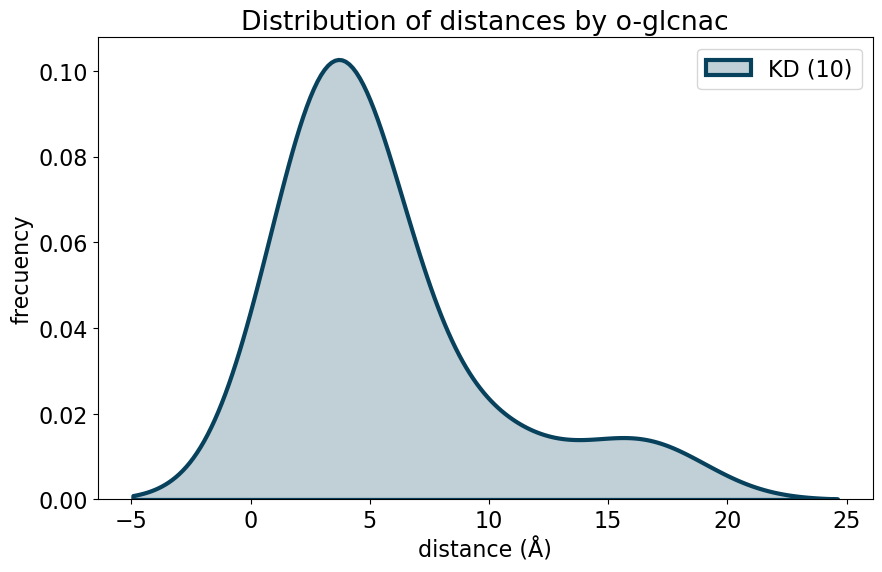

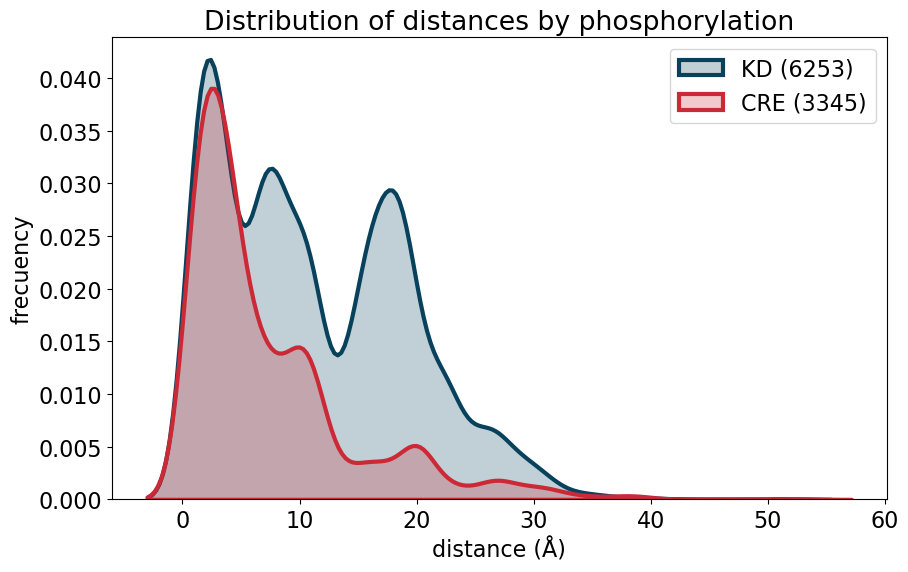

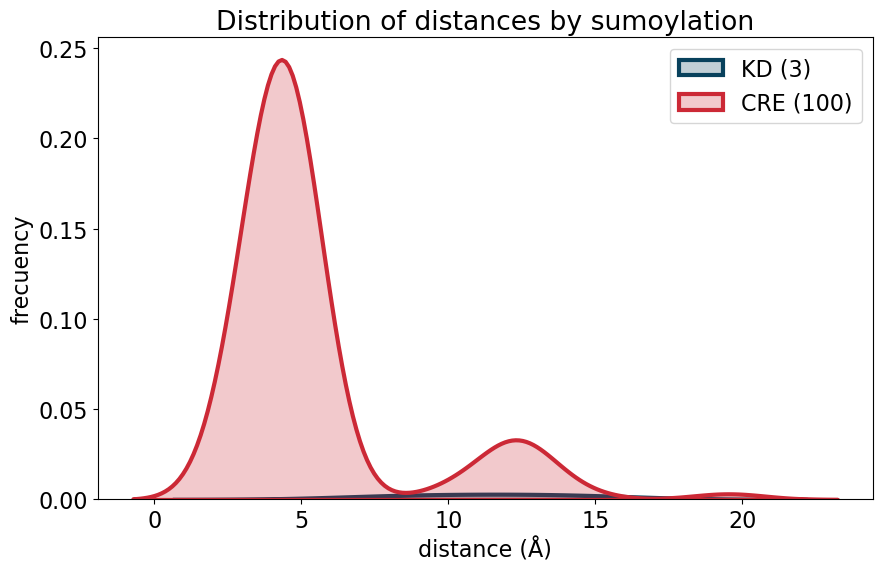

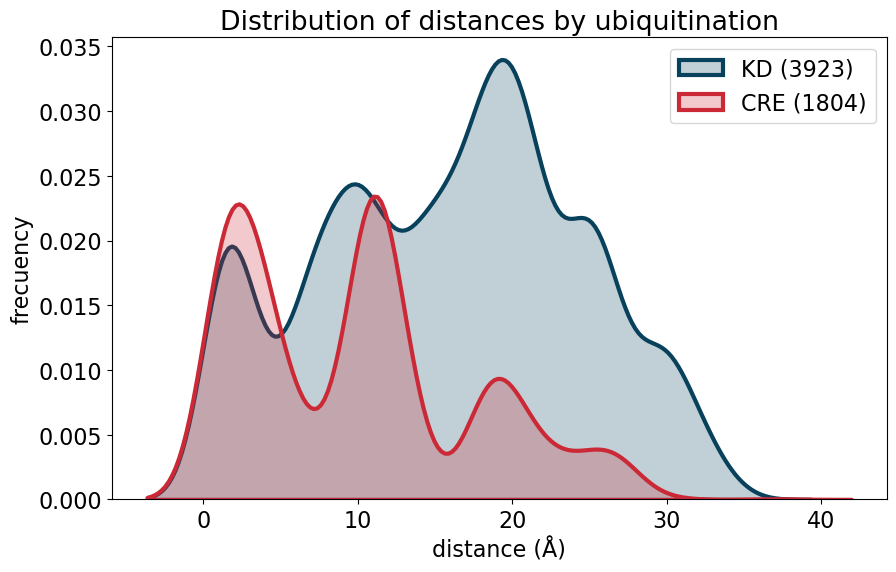

In [154]:
for ptm, subset in df.groupby('ptm'):

    plt.figure(figsize= (10, 6))
    plt.rcParams['font.size'] = 16
    sns.kdeplot(x= 'dist', data= subset, hue= 'feature', hue_order=['cre', 'kd'], palette= ['#cc2936', '#08415c'], fill= True, linewidth= 3) # , binwidth= 2
    plt.title(f"Distribution of distances by {ptm}")
    plt.ylabel('frecuency')
    plt.xlabel('distance (Å)')
    legend = [f"KD ({subset.feature.value_counts()['kd']})", f"CRE ({subset.feature.value_counts()['cre']})"]
    plt.legend(legend) 
    #plt.hlines(y=6, xmin=-0.5, xmax=5.5, colors= 'r')
    plt.show()

In [76]:
df2.ptm.value_counts()

phosphorylation    3859
ubiquitination     1282
methylation         459
sumoylation          86
acetylation          68
o-glcnac              8
Name: ptm, dtype: int64

In [87]:
df.groupby('ptm')[['dist', 'feature']]

In [95]:
dist_kd = df[(df.ptm == 'phosphorylation') & (df.feature == 'kd') & (df.dist <= 6)].dist.nunique()
dist_cre = df[(df.ptm == 'phosphorylation') & (df.feature == 'cre') & (df.dist <= 6)].dist.nunique()

In [103]:
distancias = pd.DataFrame({'dist': [dist_kd, dist_cre]})

In [111]:
distancias

,dist
0,1868
1,1911


<BarContainer object of 2 artists>

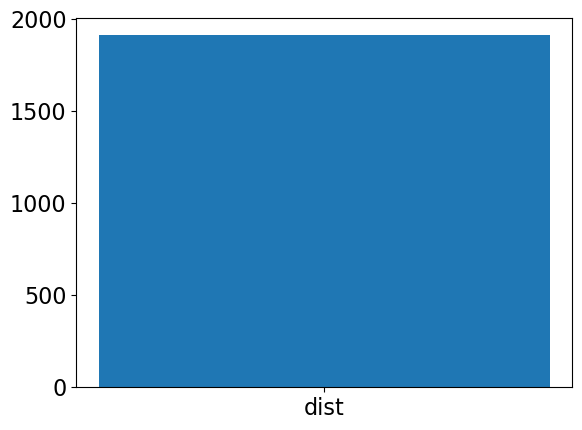

In [112]:
plt.bar(height= distancias.dist, x= 'dist')

344      4.598576
372      5.429343
376      5.045967
536      5.366776
633      3.451085
           ...   
60244    2.888161
60251    2.947065
60289    2.799832
60290    3.140278
60296    2.760634
Name: dist, Length: 1971, dtype: float64

In [ ]:


feature = []
for ix, row in prueba.iterrows():
    if row.phosphorylation_site == row.pos_cre_uniprot:
        feature.append("cre")
    elif row.phosphorylation_site == row.pos_kd_uniprot:
        feature.append("kd")

prueba["feature"] = feature
prueba["phosphorylation_site"] = "phosphorylation_site"

In [ ]:
for msa, df in ptms.groupby("msa"):

    # Add feature col
    feature = []
    for ix, row in df.iterrows():
        if row.phosphorylation_site == row.pos_cre_uniprot:
            feature.append("cre")
        elif row.phosphorylation_site == row.pos_kd_uniprot:
            feature.append("kd")

    df["feature"] = feature

In [ ]:
fig= sns.violinplot(x= 'msa', y=)